In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
from math import floor
from scipy.integrate import solve_ivp

from mentevo.utils import gaussian_g_vector, build_forward_matrix, build_cue_vector
from mentevo.plots import plot_curves
from mentevo.experiment import Experiment
from mentevo.metrics import compute_performance

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0, 0.5, 'Best g')

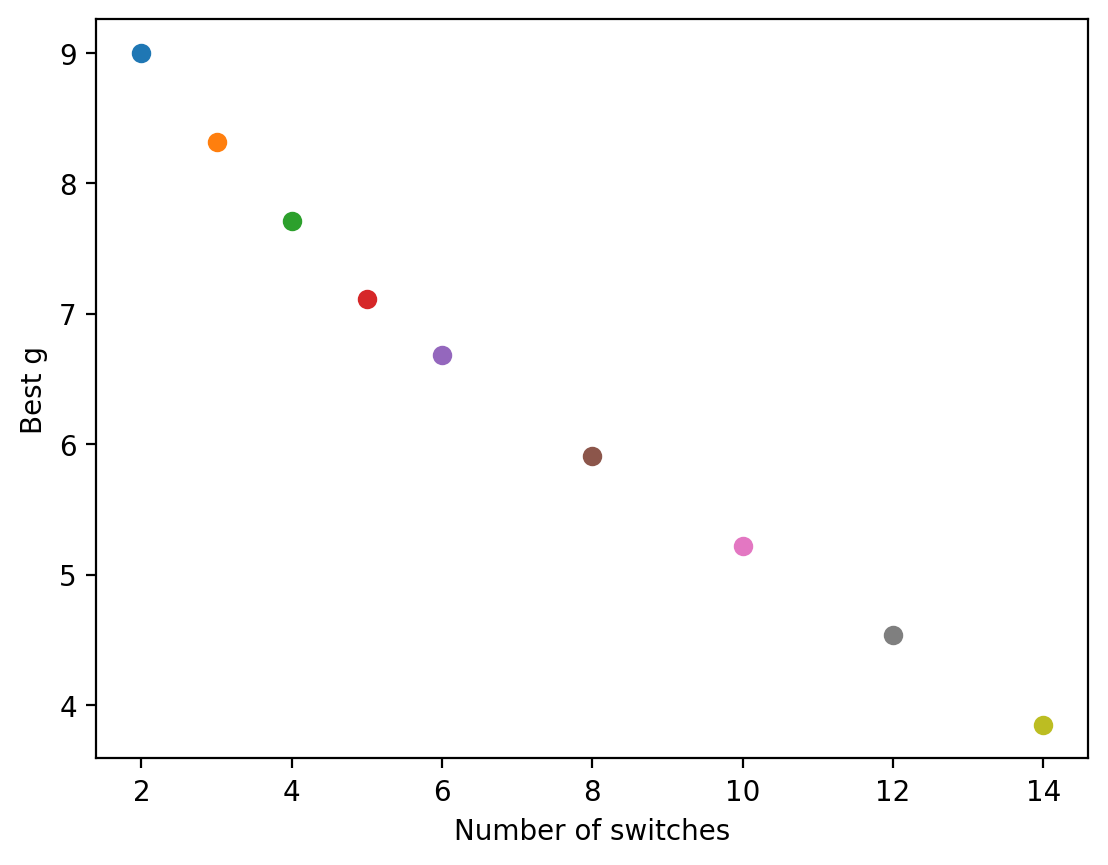

In [11]:
import matplotlib.pyplot as plt

def set_size(w, h):
  plt.figure(figsize=(w, h))

d = 0.2
tau = 10.0
alpha = 0.03
beta = 0.01
gamma = 0.02

DATA = {}

for nb_switches in [2, 3, 4, 5, 6, 8, 10, 12, 14]:
  DATA[nb_switches] = {}

  for g in np.linspace(0.5, 9.0, 100):

    experiment = Experiment(number_of_agents=4,
                            number_of_tasks=2,
                            communication_graph=None,
                            task_graph=None,
                            alpha=alpha,
                            beta=beta,
                            gamma=gamma,
                            delta=0.0,
                            d=d,
                            tau=tau,
                            g=np.array([g, g, g, g]),
                            bias_value=0.1,
                            initial_state=None,
                            total_time=4_000,
                            nb_switches=nb_switches,
                            nb_informed=None)

    curves = experiment.solve()
    scores = compute_performance(experiment, curves)
    score = np.mean(scores)

    DATA[nb_switches][g] = score

best_g_data = []

for nb_switches in DATA.keys():
  # look for the best keys
  best_g = max(DATA[nb_switches], key=DATA[nb_switches].get)
  best_g_data.append((nb_switches, best_g))

for x, y in best_g_data:
  plt.scatter(x, y)

plt.xlabel("Number of switches")
plt.ylabel("Best g")

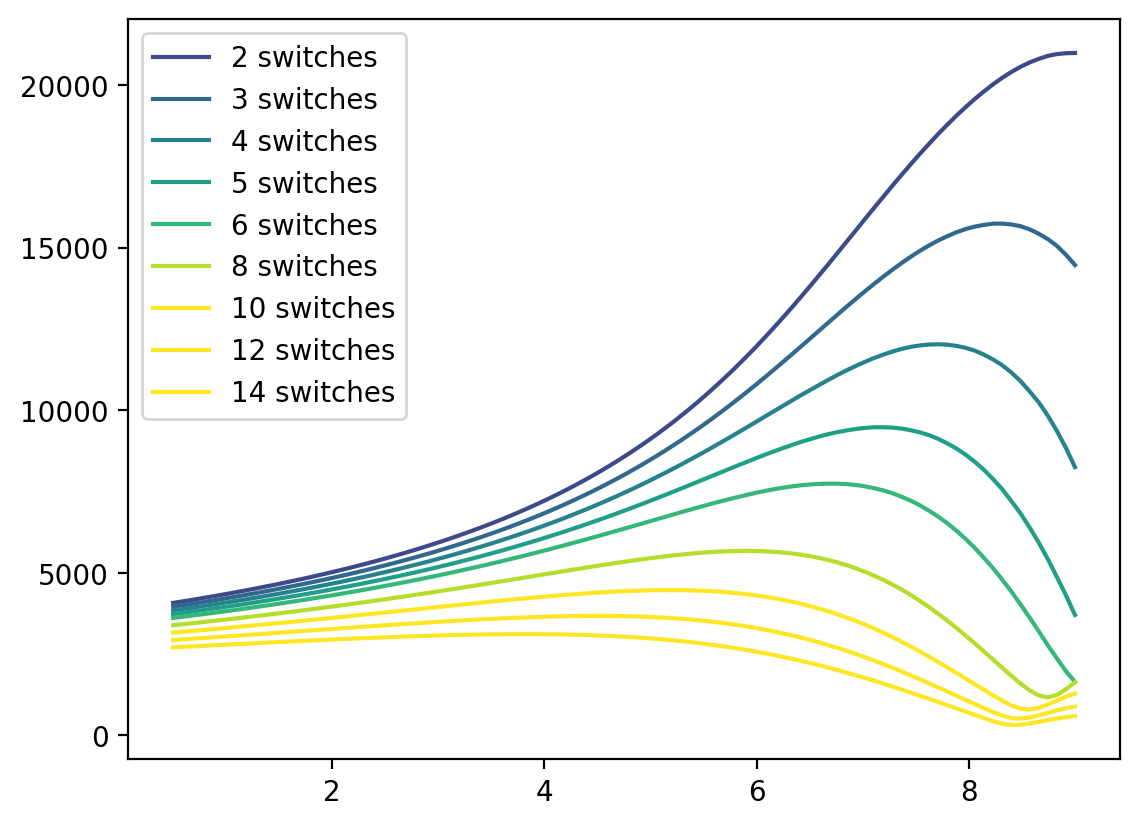

In [12]:
cmap = plt.get_cmap("viridis")

for s in DATA.keys():
  plt.plot(list(DATA[s].keys()), list(DATA[s].values()), label=f"{s} switches", color=cmap(s / len(DATA.keys())))

plt.legend()